# This notebook plot the sequence similarity score with reverse and reverse-complement sequnces
- only within-class TE pairs
- both human and mouse

In [1]:
import math

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Bio import SeqIO, pairwise2
from itertools import combinations

/home/lucy/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [3]:
from scipy import stats

In [4]:
from matplotlib.patches import Patch

In [5]:
import os

In [70]:
import sequence_comparison as seqComp

## load data

In [10]:
result_path = "./sequence_similarity_results/score_rv_comple_result/"

In [11]:
fnames = pd.Series( os.listdir(result_path) )

In [8]:
squire_fnames = fnames[fnames.str.startswith("squire")]
squire_fnames.sort_values(inplace=True)
squire_fnames

22    squire_mut_up_last50_pairwise_identity.csv
26     squire_mut_up_top10_pairwise_identity.csv
21     squire_mut_up_top20_pairwise_identity.csv
27         squire_rand10_1_pairwise_identity.csv
24         squire_rand10_2_pairwise_identity.csv
13         squire_rand10_3_pairwise_identity.csv
2          squire_rand20_1_pairwise_identity.csv
9          squire_rand20_2_pairwise_identity.csv
11         squire_rand20_3_pairwise_identity.csv
5          squire_rand50_1_pairwise_identity.csv
28         squire_rand50_2_pairwise_identity.csv
17         squire_rand50_3_pairwise_identity.csv
14      squire_wt_up_top10_pairwise_identity.csv
10      squire_wt_up_top20_pairwise_identity.csv
15      squire_wt_up_top33_pairwise_identity.csv
dtype: object

In [45]:
squire_dfs = []
for sf in squire_fnames:
    d = pd.read_csv( result_path + sf, header = 0, index_col = None )
    squire_dfs.append( d )

In [85]:
len( squire_dfs )

15

In [96]:
squire_top50_df = pd.read_csv("./sequence_similarity_results/score_rv_comple_result/squire_mut_up_top50_pairwise_identity.csv", header = 0, index_col = None )

In [86]:
new_name = pd.Series( ['squire_mut_up_top50_pairwise_identity.csv'])

In [87]:
squire_fnames2 = pd.concat( [squire_fnames, new_name ],ignore_index=True )
squire_fnames2

0     squire_mut_up_last50_pairwise_identity.csv
1      squire_mut_up_top10_pairwise_identity.csv
2      squire_mut_up_top20_pairwise_identity.csv
3          squire_rand10_1_pairwise_identity.csv
4          squire_rand10_2_pairwise_identity.csv
5          squire_rand10_3_pairwise_identity.csv
6          squire_rand20_1_pairwise_identity.csv
7          squire_rand20_2_pairwise_identity.csv
8          squire_rand20_3_pairwise_identity.csv
9          squire_rand50_1_pairwise_identity.csv
10         squire_rand50_2_pairwise_identity.csv
11         squire_rand50_3_pairwise_identity.csv
12      squire_wt_up_top10_pairwise_identity.csv
13      squire_wt_up_top20_pairwise_identity.csv
14      squire_wt_up_top33_pairwise_identity.csv
15     squire_mut_up_top50_pairwise_identity.csv
dtype: object

In [99]:
squire_dfs= squire_dfs[0:-1]

In [100]:
squire_dfs[-1]= squire_top50_df 

In [98]:
len( squire_dfs )

17

In [83]:
tcps_fnames = fnames[fnames.str.startswith("tcps")]
tcps_fnames.sort_values(inplace=True)
tcps_fnames

12        tcps_ad_up_all_pairwise_identity.csv
1          tcps_rand10_1_pairwise_identity.csv
23         tcps_rand10_2_pairwise_identity.csv
25         tcps_rand10_3_pairwise_identity.csv
3          tcps_rand20_1_pairwise_identity.csv
4          tcps_rand20_2_pairwise_identity.csv
7          tcps_rand20_3_pairwise_identity.csv
20         tcps_rand50_1_pairwise_identity.csv
16         tcps_rand50_2_pairwise_identity.csv
8          tcps_rand50_3_pairwise_identity.csv
18    tcps_ser_up_last50_pairwise_identity.csv
19     tcps_ser_up_top10_pairwise_identity.csv
6      tcps_ser_up_top20_pairwise_identity.csv
0      tcps_ser_up_top50_pairwise_identity.csv
dtype: object

In [91]:
len( tcps_fnames)

14

In [14]:
tcps_dfs = []
for tf in tcps_fnames:
    d = pd.read_csv( result_path + tf, header = 0, index_col = None )
    tcps_dfs.append( d )

In [92]:
len( tcps_dfs )

15

In [93]:
tcps_dfs = tcps_dfs[0:-1]

In [94]:
len( tcps_dfs )

14

In [16]:
tcps_dfs[0].head()

,ID1,ID2,PercentIdentity,Alignment_str
0,L2c_97668_rvcmp,L2c_97668_cmp,64.285714,acatttat--tgacatctaccc--ac--tgcaag-tatagat-g--...
1,L2c_97668_rvcmp,L2c_97668,61.038961,a-catt-ta-ttgacatctacccactgcaagt-atagatgaataag...
2,L2c_97668_rvcmp,L2b_80878_rvcmp,32.629108,ac--a--t-t-tatt---gaca-tcta---c---c--c----a---...
3,L2c_97668_rvcmp,L2b_80878_cmp,32.159624,a----cattta--------ttgac-a-----t-------c----t-...
4,L2c_97668_rvcmp,L2b_80878,32.394366,a-cat-t-tatt---gac--a--t-ct-----a-ccc-a--ctgc-...


In [17]:
squire_indiv = pd.read_csv("/home/lucy/Dropbox/turner_organoid_bulk_RNA_local/Deseq_indiv_dTE_results.csv", header = 0, index_col = 0 )

In [18]:
squire_df_ind = squire_indiv.index.astype(str) + "_" + squire_indiv['repName']
squire_indiv['df_index_repName'] = squire_df_ind

In [19]:
squire_indiv2 = squire_indiv.set_index('df_index_repName')

In [35]:
squire_repClass_dict = dict( zip( squire_indiv2.index, squire_indiv2['repClass'] ))
#repFamily_dict = dict( zip( squire_indiv2.index, squire_indiv2['repFamily'] ))

In [38]:
squire_indiv2.head()

,TE_ID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,element_type,TE_name,TE_index,repName,repFamily,repClass,genoName,genoStart,genoEnd,strand
df_index_repName,,,,,,,,,,,,,,,,,
0_PB1D9,"chr13|73480020|73480091|PB1D9:Alu:SINE|268|-,.",9.000885,-0.489762,0.629289,-0.778278,0.800222,1.0,TE,PB1D9:Alu:SINE,PB1D9:Alu:SINE_268,PB1D9,Alu,SINE,chr13,73480020,73480091,-
1_RSINE1,"chr5|117467874|117468005|RSINE1:B4:SINE|183|-,.",0.730917,-2.916743,3.081604,-0.946502,0.368835,1.0,TE,RSINE1:B4:SINE,RSINE1:B4:SINE_183,RSINE1,B4,SINE,chr5,117467874,117468005,-
2_ID4,"chr3|96619212|96619284|ID4:ID:SINE|194|+,.",5.772588,0.121464,0.852163,0.142536,0.942801,1.0,TE,ID4:ID:SINE,ID4:ID:SINE_194,ID4,ID,SINE,chr3,96619212,96619284,+
3_PB1,"chr15|93388865|93388965|PB1:Alu:SINE|227|-,.",32.028966,-0.216654,0.390147,-0.555314,0.978578,1.0,TE,PB1:Alu:SINE,PB1:Alu:SINE_227,PB1,Alu,SINE,chr15,93388865,93388965,-
4_B2_Mm2,"chr11|94175967|94176153|B2_Mm2:B2:SINE|98|-,.",7.127690,0.305487,0.591882,0.516129,0.893386,1.0,TE,B2_Mm2:B2:SINE,B2_Mm2:B2:SINE_98,B2_Mm2,B2,SINE,chr11,94175967,94176153,-


In [40]:
squire_indiv2[squire_indiv2.index.str.startswith('8873')]

,TE_ID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,element_type,TE_name,TE_index,repName,repFamily,repClass,genoName,genoStart,genoEnd,strand
df_index_repName,,,,,,,,,,,,,,,,,
8873_IAPLTR1a_Mm,chr9|78474948|78475285|IAPLTR1a_Mm:ERVK:LTR|24...,13.24431,7.262875,1.11393,6.520044,9.420466e-09,0.000001,TE,IAPLTR1a_Mm:ERVK:LTR,IAPLTR1a_Mm:ERVK:LTR_24,IAPLTR1a_Mm,ERVK,LTR,chr9,78474948,78475285,-


In [41]:
squire_repClass_dict['8873_IAPLTR1a_Mm']

'LTR'

In [21]:
deseq_df = pd.read_csv("/home/lucy/Dropbox/TCPS_TE_results/TE_indi_deseq_zc.csv", header = 0,index_col =  0)

In [22]:
deseq_df.head()

,TE name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,repName,repClass,repFamily
0,L2,0.097405,0.197787,1.457064,0.135744,0.892024,0.999991,L2,LINE,L2
1,AluSg,0.493240,1.038439,0.909837,1.141346,0.253726,0.999991,AluSg,SINE,Alu
2,L1PA8A,1.504698,-0.263127,0.834217,-0.315418,0.752444,0.999991,L1PA8A,LINE,L1
3,L1MDb,0.179092,0.166453,1.381934,0.120449,0.904127,0.999991,L1MDb,LINE,L1
4,AluSp,0.033562,0.514654,3.312685,0.155358,0.876539,0.999991,AluSp,SINE,Alu


In [32]:
deseq_df['TE name'].duplicated().sum()

0

In [33]:
tcps_repClass_dict = dict( zip( deseq_df['TE name'], deseq_df['repClass'] ))
#repFamily_dict = dict( zip( deseq_df['TE name'], deseq_df['repFamily'] ))

## map repClass information to result df

In [25]:
test_df1 = tcps_dfs[0]
test_df1.head(2)

,ID1,ID2,PercentIdentity,Alignment_str
0,L2c_97668_rvcmp,L2c_97668_cmp,64.285714,acatttat--tgacatctaccc--ac--tgcaag-tatagat-g--...
1,L2c_97668_rvcmp,L2c_97668,61.038961,a-catt-ta-ttgacatctacccactgcaagt-atagatgaataag...


In [27]:
# remove suffix
id1a = [ "_".join( s.split("_")[0:-1] ) for s in test_df1['ID1'] ]

In [29]:
#id1a

In [63]:
def add_class_info( identity_df, repClass_dict ):
    
    # extract TE name without suffix
    id1a = []
    id2a = []
    for id1,id2 in identity_df[['ID1' ,'ID2']].values:
        id1_ls = id1.split("_")
        if( id1_ls[-1].endswith('cmp') ):
            id1a.append( "_".join( id1_ls[0:-1]) )
        else:
            id1a.append( id1)

        id2_ls = id2.split("_")
        if( id2_ls[-1].endswith('cmp') ):
            id2a.append( "_".join( id2_ls[0:-1]) )
        else:
            id2a.append( id2)
        
    
    # add original TE name to result df
    identity_df['ID1a'] = id1a
    identity_df['ID2a'] = id2a

    #map with dict
    identity_df['repClass1'] = [ repClass_dict[k] for k in identity_df['ID1a'] ]
    identity_df['repClass2'] = [ repClass_dict[k] for k in identity_df['ID2a'] ]
    
    return identity_df
    

### map squire data

In [61]:
list( squire_repClass_dict.keys() )[0:10]

['0_PB1D9',
 '1_RSINE1',
 '2_ID4',
 '3_PB1',
 '4_B2_Mm2',
 '5_RSINE1',
 '6_Lx4B',
 '7_ORR1D2',
 '8_B2_Mm2',
 '9_URR1A']

In [47]:
squire_dfs[0].head()

,ID1,ID2,PercentIdentity,Alignment_str
0,8873_IAPLTR1a_Mm_rvcmp,8873_IAPLTR1a_Mm_cmp,64.391691,tgttatt-agacgcgttctcacga-c-cggccag-ga-aagacg-c...
1,8873_IAPLTR1a_Mm_rvcmp,8873_IAPLTR1a_Mm,65.281899,tgttattag--a-c-gcgttctcacgac---cggccagg--a-aag...
2,8873_IAPLTR1a_Mm_rvcmp,279_RLTR4_MM-int_rvcmp,15.911237,--t--------g------------tta-t-t-a-------g-----...
3,8873_IAPLTR1a_Mm_rvcmp,279_RLTR4_MM-int_cmp,15.911237,t---g----t----t-------------a-----------------...
4,8873_IAPLTR1a_Mm_rvcmp,279_RLTR4_MM-int,15.911237,--tg----t--t--a-------------tt----------------...


In [59]:
for a,b in squire_dfs[0][['ID1' ,'ID2']].values:
    print( a,b)

8873_IAPLTR1a_Mm_rvcmp 8873_IAPLTR1a_Mm_cmp
8873_IAPLTR1a_Mm_rvcmp 8873_IAPLTR1a_Mm
8873_IAPLTR1a_Mm_rvcmp 279_RLTR4_MM-int_rvcmp
8873_IAPLTR1a_Mm_rvcmp 279_RLTR4_MM-int_cmp
8873_IAPLTR1a_Mm_rvcmp 279_RLTR4_MM-int
8873_IAPLTR1a_Mm_rvcmp 2226_IAPEz-int_rvcmp
8873_IAPLTR1a_Mm_rvcmp 2226_IAPEz-int_cmp
8873_IAPLTR1a_Mm_rvcmp 2226_IAPEz-int
8873_IAPLTR1a_Mm_rvcmp 1401_RLTR4_Mm_rvcmp
8873_IAPLTR1a_Mm_rvcmp 1401_RLTR4_Mm_cmp
8873_IAPLTR1a_Mm_rvcmp 1401_RLTR4_Mm
8873_IAPLTR1a_Mm_rvcmp 2240_IAPEz-int_rvcmp
8873_IAPLTR1a_Mm_rvcmp 2240_IAPEz-int_cmp
8873_IAPLTR1a_Mm_rvcmp 2240_IAPEz-int
8873_IAPLTR1a_Mm_rvcmp 6296_IAPEY4_I_rvcmp
8873_IAPLTR1a_Mm_rvcmp 6296_IAPEY4_I_cmp
8873_IAPLTR1a_Mm_rvcmp 6296_IAPEY4_I
8873_IAPLTR1a_Mm_rvcmp 12106_MT2B1_rvcmp
8873_IAPLTR1a_Mm_rvcmp 12106_MT2B1_cmp
8873_IAPLTR1a_Mm_rvcmp 12106_MT2B1
8873_IAPLTR1a_Mm_rvcmp 3954_RLTR4_Mm_rvcmp
8873_IAPLTR1a_Mm_rvcmp 3954_RLTR4_Mm_cmp
8873_IAPLTR1a_Mm_rvcmp 3954_RLTR4_Mm
8873_IAPLTR1a_Mm_rvcmp 1762_RLTR4_MM-int_rvcmp
8873_IAPLTR1a

In [65]:
for d in squire_dfs:
    d = add_class_info( d, squire_repClass_dict )
    #print( d2.head() )

In [101]:
squire_dfs[-1].head()

,ID1,ID2,PercentIdentity,Alignment_str
0,9437_RLTR4_MM-int_rvcmp,9437_RLTR4_MM-int_cmp,64.314869,aggggcc-ctgattccgagggg---tgtt-tcctcgcttaagg-ga...
1,9437_RLTR4_MM-int_rvcmp,9437_RLTR4_MM-int,64.081633,-ag---g--ggc-cct-g--a-t--t----cc--g--ag-------...
2,9437_RLTR4_MM-int_rvcmp,11292_RLTR4_Mm_rvcmp,21.603499,aggggccctgattccgaggggtgtttcctcgcttaagggaaataag...
3,9437_RLTR4_MM-int_rvcmp,11292_RLTR4_Mm_cmp,21.603499,aggggccctgattccgaggggtgtttcctcgcttaagggaaataag...
4,9437_RLTR4_MM-int_rvcmp,11292_RLTR4_Mm,21.603499,aggggccctgattccgaggggtgtttcctcgcttaagggaaataag...


In [102]:
squire_dfs[-1] = add_class_info( squire_dfs[-1] , squire_repClass_dict )

In [103]:
squire_dfs[-1].head()

,ID1,ID2,PercentIdentity,Alignment_str,ID1a,ID2a,repClass1,repClass2
0,9437_RLTR4_MM-int_rvcmp,9437_RLTR4_MM-int_cmp,64.314869,aggggcc-ctgattccgagggg---tgtt-tcctcgcttaagg-ga...,9437_RLTR4_MM-int,9437_RLTR4_MM-int,LTR,LTR
1,9437_RLTR4_MM-int_rvcmp,9437_RLTR4_MM-int,64.081633,-ag---g--ggc-cct-g--a-t--t----cc--g--ag-------...,9437_RLTR4_MM-int,9437_RLTR4_MM-int,LTR,LTR
2,9437_RLTR4_MM-int_rvcmp,11292_RLTR4_Mm_rvcmp,21.603499,aggggccctgattccgaggggtgtttcctcgcttaagggaaataag...,9437_RLTR4_MM-int,11292_RLTR4_Mm,LTR,LTR
3,9437_RLTR4_MM-int_rvcmp,11292_RLTR4_Mm_cmp,21.603499,aggggccctgattccgaggggtgtttcctcgcttaagggaaataag...,9437_RLTR4_MM-int,11292_RLTR4_Mm,LTR,LTR
4,9437_RLTR4_MM-int_rvcmp,11292_RLTR4_Mm,21.603499,aggggccctgattccgaggggtgtttcctcgcttaagggaaataag...,9437_RLTR4_MM-int,11292_RLTR4_Mm,LTR,LTR


In [67]:
squire_dfs[0].tail()

,ID1,ID2,PercentIdentity,Alignment_str,ID1a,ID2a,repClass1,repClass2
11170,1028_RMER17B2,845_L1MC2_cmp,50.821596,tgtcggactg-t---g------a-aaggcagcctgttttctggt-c...,1028_RMER17B2,845_L1MC2,LTR,LINE
11171,1028_RMER17B2,845_L1MC2,51.525822,tg--tcggactgt--ga-aaggcagcctgt-ttt-c------tggt...,1028_RMER17B2,845_L1MC2,LTR,LINE
11172,845_L1MC2_rvcmp,845_L1MC2_cmp,66.131621,tatg-c-ctgtga-tgtttctct-atat--tc-tttt-tcac-aac...,845_L1MC2,845_L1MC2,LINE,LINE
11173,845_L1MC2_rvcmp,845_L1MC2,61.958266,ta-tgc------ct--gtgatgt-ttct-ctatatt--ct-t--tt...,845_L1MC2,845_L1MC2,LINE,LINE
11174,845_L1MC2_cmp,845_L1MC2,59.550562,ttactcttctgttcctcat-a-aatgttttgtacgaactattttct...,845_L1MC2,845_L1MC2,LINE,LINE


### map tcps repClass

In [68]:
for d in tcps_dfs:
    d = add_class_info( d, tcps_repClass_dict )

In [69]:
tcps_dfs[0].head()

,ID1,ID2,PercentIdentity,Alignment_str,ID1a,ID2a,repClass1,repClass2
0,L2c_97668_rvcmp,L2c_97668_cmp,64.285714,acatttat--tgacatctaccc--ac--tgcaag-tatagat-g--...,L2c_97668,L2c_97668,LINE,LINE
1,L2c_97668_rvcmp,L2c_97668,61.038961,a-catt-ta-ttgacatctacccactgcaagt-atagatgaataag...,L2c_97668,L2c_97668,LINE,LINE
2,L2c_97668_rvcmp,L2b_80878_rvcmp,32.629108,ac--a--t-t-tatt---gaca-tcta---c---c--c----a---...,L2c_97668,L2b_80878,LINE,LINE
3,L2c_97668_rvcmp,L2b_80878_cmp,32.159624,a----cattta--------ttgac-a-----t-------c----t-...,L2c_97668,L2b_80878,LINE,LINE
4,L2c_97668_rvcmp,L2b_80878,32.394366,a-cat-t-tatt---gac--a--t-ct-----a-ccc-a--ctgc-...,L2c_97668,L2b_80878,LINE,LINE


## get squire summary df

In [105]:
# get squire
squire_fnames2

0     squire_mut_up_last50_pairwise_identity.csv
1      squire_mut_up_top10_pairwise_identity.csv
2      squire_mut_up_top20_pairwise_identity.csv
3          squire_rand10_1_pairwise_identity.csv
4          squire_rand10_2_pairwise_identity.csv
5          squire_rand10_3_pairwise_identity.csv
6          squire_rand20_1_pairwise_identity.csv
7          squire_rand20_2_pairwise_identity.csv
8          squire_rand20_3_pairwise_identity.csv
9          squire_rand50_1_pairwise_identity.csv
10         squire_rand50_2_pairwise_identity.csv
11         squire_rand50_3_pairwise_identity.csv
12      squire_wt_up_top10_pairwise_identity.csv
13      squire_wt_up_top20_pairwise_identity.csv
14      squire_wt_up_top33_pairwise_identity.csv
15     squire_mut_up_top50_pairwise_identity.csv
dtype: object

In [106]:
assert( len( squire_fnames2) == len( squire_dfs ))

In [107]:
squire_f_inds = [ 'mut_up_last50' ] + [ f'mut_up_top{n}' for n in [10,20] ]

In [109]:
rand_inds = [ f'rand{n}_{r}' for n in [10,20,50] for r in [1,2,3] ]
rand_inds

['rand10_1',
 'rand10_2',
 'rand10_3',
 'rand20_1',
 'rand20_2',
 'rand20_3',
 'rand50_1',
 'rand50_2',
 'rand50_3']

In [110]:
wt_inds = [ f'wt_up_top{n}' for n in [10,20, 33] ]

In [111]:
squire_f_inds = squire_f_inds + rand_inds + wt_inds + ['mut_up_top50']

In [112]:
assert( len( squire_fnames2) == len( squire_f_inds ))

In [113]:
squire_f_inds

['mut_up_last50',
 'mut_up_top10',
 'mut_up_top20',
 'rand10_1',
 'rand10_2',
 'rand10_3',
 'rand20_1',
 'rand20_2',
 'rand20_3',
 'rand50_1',
 'rand50_2',
 'rand50_3',
 'wt_up_top10',
 'wt_up_top20',
 'wt_up_top33',
 'mut_up_top50']

In [114]:
conditions = [ 'mut_up' for i in range(3) ] + ['control' for i in range(len( rand_inds))] + [ 'wt_up' for i in range(3)] + ['mut_up']

In [116]:
conditions

['mut_up',
 'mut_up',
 'mut_up',
 'control',
 'control',
 'control',
 'control',
 'control',
 'control',
 'control',
 'control',
 'control',
 'wt_up',
 'wt_up',
 'wt_up',
 'mut_up']

In [115]:
assert( len( squire_fnames2) == len( conditions ))

In [117]:
squire_f_inds

['mut_up_last50',
 'mut_up_top10',
 'mut_up_top20',
 'rand10_1',
 'rand10_2',
 'rand10_3',
 'rand20_1',
 'rand20_2',
 'rand20_3',
 'rand50_1',
 'rand50_2',
 'rand50_3',
 'wt_up_top10',
 'wt_up_top20',
 'wt_up_top33',
 'mut_up_top50']

In [123]:
squire_total_nums = [ 50, 10, 20 ] + [ 10 for i in range(3)] + [ 20 for i in range(3)] + [ 50 for i in range(3)]

In [124]:
squire_total_nums = squire_total_nums + [10,20, 33, 50 ]

In [125]:
squire_total_nums = pd.Series( squire_total_nums )

In [126]:
squire_total_nums = squire_total_nums *3

In [127]:
squire_total_nums

0     150
1      30
2      60
3      30
4      30
5      30
6      60
7      60
8      60
9     150
10    150
11    150
12     30
13     60
14     99
15    150
dtype: int64

In [129]:
squire_summ_df = seqComp.get_summary_df( squire_dfs, df_index_names=squire_f_inds, conditions=conditions,
                       num_elements_sampled=squire_total_nums, verbose = True)

mut_up_last50
Original df has 11175 elements
Filtered df has 8718 elements
0.7801342281879194 left

mut_up_top10
Original df has 435 elements
Filtered df has 354 elements
0.8137931034482758 left

mut_up_top20
Original df has 1770 elements
Filtered df has 1311 elements
0.7406779661016949 left

rand10_1
Original df has 435 elements
Filtered df has 174 elements
0.4 left

rand10_2
Original df has 435 elements
Filtered df has 147 elements
0.33793103448275863 left

rand10_3
Original df has 435 elements
Filtered df has 282 elements
0.6482758620689655 left

rand20_1
Original df has 1770 elements
Filtered df has 762 elements
0.43050847457627117 left

rand20_2
Original df has 1770 elements
Filtered df has 681 elements
0.3847457627118644 left

rand20_3
Original df has 1770 elements
Filtered df has 645 elements
0.3644067796610169 left

rand50_1
Original df has 11175 elements
Filtered df has 4344 elements
0.3887248322147651 left

rand50_2
Original df has 11175 elements
Filtered df has 4002 elements

In [130]:
squire_summ_df.T.head()

,avg_pctIdentity,std_pctIdentity,sum_pctIdentity,num_element_sampled,num_combination_all,num_combination_left,adjusted_avg_pctIdentity,adjusted_std_pctIdentity,condition
mut_up_last50,30.967212,19.998811,269972.156049,150,11175,8718,24.158582,15.601757,mut_up
mut_up_top10,33.622176,21.407951,11902.250373,30,435,354,27.361495,17.421643,mut_up
mut_up_top20,34.433527,22.456007,45142.35443,60,1770,1311,25.504155,16.632669,mut_up
rand10_1,56.103028,7.13755,9761.926831,30,435,174,22.441211,2.85502,control
rand10_2,43.767418,17.738312,6433.810505,30,435,147,14.790369,5.994326,control


In [131]:
squire_sum_df = squire_summ_df.T

## get tcps sum df

In [132]:
tcps_fnames

12        tcps_ad_up_all_pairwise_identity.csv
1          tcps_rand10_1_pairwise_identity.csv
23         tcps_rand10_2_pairwise_identity.csv
25         tcps_rand10_3_pairwise_identity.csv
3          tcps_rand20_1_pairwise_identity.csv
4          tcps_rand20_2_pairwise_identity.csv
7          tcps_rand20_3_pairwise_identity.csv
20         tcps_rand50_1_pairwise_identity.csv
16         tcps_rand50_2_pairwise_identity.csv
8          tcps_rand50_3_pairwise_identity.csv
18    tcps_ser_up_last50_pairwise_identity.csv
19     tcps_ser_up_top10_pairwise_identity.csv
6      tcps_ser_up_top20_pairwise_identity.csv
0      tcps_ser_up_top50_pairwise_identity.csv
dtype: object

In [133]:
tcps_inds = ['AD_up'] + rand_inds + ['SER_up_last50']+ [ f'SER_up_top{n}' for n in [10,20,50] ]

In [134]:
assert( len( tcps_dfs) == len( tcps_inds) )

In [135]:
tcps_inds

['AD_up',
 'rand10_1',
 'rand10_2',
 'rand10_3',
 'rand20_1',
 'rand20_2',
 'rand20_3',
 'rand50_1',
 'rand50_2',
 'rand50_3',
 'SER_up_last50',
 'SER_up_top10',
 'SER_up_top20',
 'SER_up_top50']

In [136]:
tcps_cond =  ['AD_up'] + ['control' for i in range(9) ] + ['SER_up' for i in range(4 )]

In [137]:
assert( len( tcps_dfs) == len( tcps_cond) )

In [138]:
tcps_total_nums = [ 9 ] + [ 10 for i in range(3)] + [ 20 for i in range(3)] + [ 50 for i in range(3)]
tcps_total_nums = tcps_total_nums + [ 50, 10, 20, 50 ]

In [139]:
tcps_total_nums = pd.Series( tcps_total_nums)
tcps_total_nums = tcps_total_nums*3

In [140]:
tcps_total_nums

0      27
1      30
2      30
3      30
4      60
5      60
6      60
7     150
8     150
9     150
10    150
11     30
12     60
13    150
dtype: int64

In [141]:
tcps_summ_df = seqComp.get_summary_df( tcps_dfs, df_index_names=tcps_inds, conditions=tcps_cond,
                       num_elements_sampled=tcps_total_nums, verbose = True)

AD_up
Original df has 351 elements
Filtered df has 144 elements
0.41025641025641024 left

rand10_1
Original df has 435 elements
Filtered df has 174 elements
0.4 left

rand10_2
Original df has 435 elements
Filtered df has 192 elements
0.4413793103448276 left

rand10_3
Original df has 435 elements
Filtered df has 246 elements
0.5655172413793104 left

rand20_1
Original df has 1770 elements
Filtered df has 501 elements
0.2830508474576271 left

rand20_2
Original df has 1770 elements
Filtered df has 789 elements
0.4457627118644068 left

rand20_3
Original df has 1770 elements
Filtered df has 681 elements
0.3847457627118644 left

rand50_1
Original df has 11175 elements
Filtered df has 4074 elements
0.36456375838926175 left

rand50_2
Original df has 11175 elements
Filtered df has 4704 elements
0.42093959731543623 left

rand50_3
Original df has 11175 elements
Filtered df has 3822 elements
0.34201342281879193 left

SER_up_last50
Original df has 11175 elements
Filtered df has 3507 elements
0.31382

In [142]:
tcps_summ_df.T.head()

,avg_pctIdentity,std_pctIdentity,sum_pctIdentity,num_element_sampled,num_combination_all,num_combination_left,adjusted_avg_pctIdentity,adjusted_std_pctIdentity,condition
AD_up,42.878736,14.868415,6174.537923,27,351,144,17.591276,6.099862,AD_up
rand10_1,35.549232,22.020211,6185.566331,30,435,174,14.219693,8.808084,control
rand10_2,46.51871,13.659351,8931.592354,30,435,192,20.532396,6.028955,control
rand10_3,58.022502,13.602979,14273.535438,30,435,246,32.812725,7.692719,control
rand20_1,46.464003,15.582119,23278.465295,60,1770,501,13.151675,4.410532,control


In [143]:
tcps_summ_df = tcps_summ_df.T

## Plot squire_result

In [149]:
squire_sum_df.sort_values( by = ['num_element_sampled', 'condition'], inplace=True)

In [150]:
condition_colors = {
    'control': 'gray',
    'mut_up': 'salmon',
    'wt_up':'cornflowerblue'
}

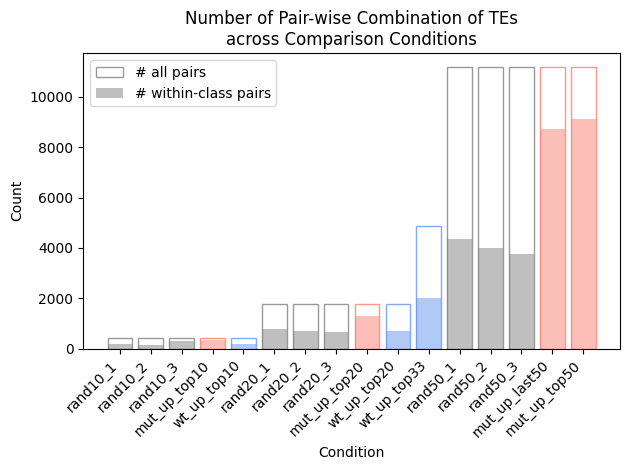

In [156]:
# Example data
summary_df = squire_sum_df.copy()


x_pos = np.arange(summary_df.shape[0])
heights1 = summary_df['num_combination_all']  # dataset 1
heights2 = summary_df['num_combination_left' ]   # dataset 2

all_pair_colors = [condition_colors[cond] for cond in summary_df['condition'] ]


bar_width = 0.8 # need to adjust

# Plot side-by-side histograms
plt.bar(x_pos , heights1, width=bar_width, label='# all pairs', alpha=0.8, edgecolor=all_pair_colors, facecolor='none',)
plt.bar(x_pos , heights2, width=bar_width, label='# within-class pairs', alpha=0.5, color =all_pair_colors)

# Add labels and legend
plt.xticks(x_pos, summary_df.index, rotation = 45, ha = 'right')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Number of Pair-wise Combination of TEs\nacross Comparison Conditions')
plt.legend()
plt.tight_layout()
plt.show()


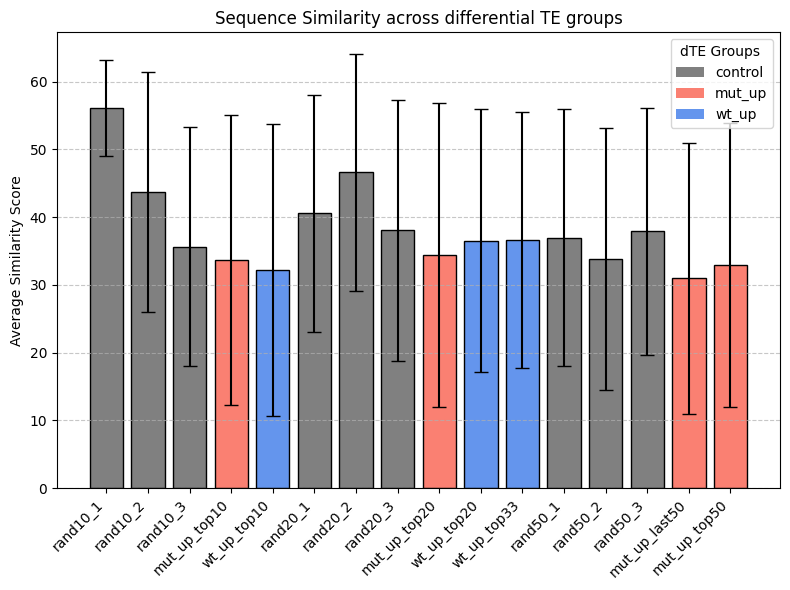

In [157]:
bar_colors = [condition_colors[cond] for cond in summary_df['condition'] ]

plt.figure(figsize=(8, 6))


plt.bar(summary_df.index, summary_df['avg_pctIdentity'] , yerr=summary_df['std_pctIdentity'], capsize=5, color=bar_colors, edgecolor='black')

plt.xticks(rotation=45, ha='right') 

legend_elements = [Patch(facecolor=color, label=cond) for cond, color in condition_colors.items()]
plt.legend(handles=legend_elements, title='dTE Groups ')


plt.ylabel('Average Similarity Score')
plt.title('Sequence Similarity across differential TE groups')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


In [159]:
summary_df.columns

Index(['avg_pctIdentity', 'std_pctIdentity', 'sum_pctIdentity',
       'num_element_sampled', 'num_combination_all', 'num_combination_left',
       'adjusted_avg_pctIdentity', 'adjusted_std_pctIdentity', 'condition'],
      dtype='object')

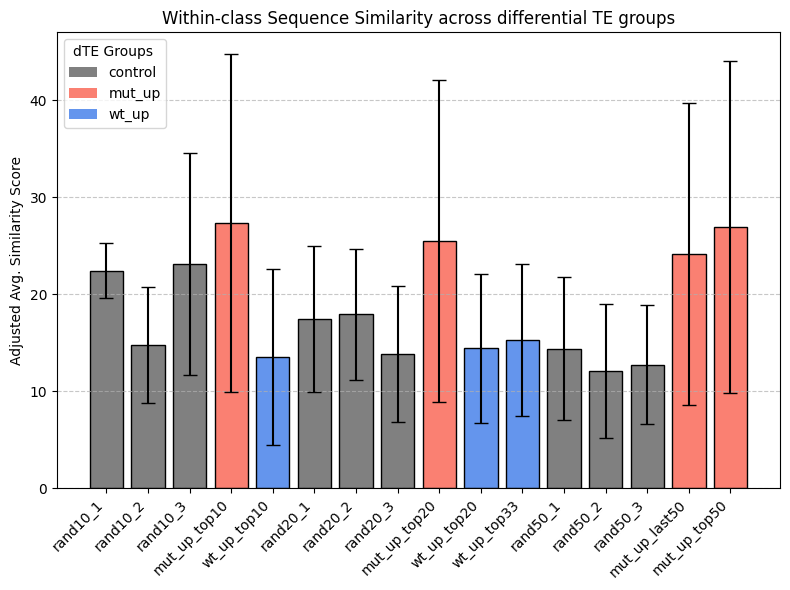

In [160]:
bar_colors = [condition_colors[cond] for cond in summary_df['condition'] ]

plt.figure(figsize=(8, 6))


plt.bar(summary_df.index, summary_df['adjusted_avg_pctIdentity'] , yerr=summary_df['adjusted_std_pctIdentity'], capsize=5, color=bar_colors, edgecolor='black')

plt.xticks(rotation=45, ha='right') 

legend_elements = [Patch(facecolor=color, label=cond) for cond, color in condition_colors.items()]
plt.legend(handles=legend_elements, title='dTE Groups ')

plt.ylabel('Adjusted Avg. Similarity Score')
plt.title('Within-class Sequence Similarity across differential TE groups')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


## plot tcps

In [161]:
tcps_summ_df.head()

,avg_pctIdentity,std_pctIdentity,sum_pctIdentity,num_element_sampled,num_combination_all,num_combination_left,adjusted_avg_pctIdentity,adjusted_std_pctIdentity,condition
AD_up,42.878736,14.868415,6174.537923,27,351,144,17.591276,6.099862,AD_up
rand10_1,35.549232,22.020211,6185.566331,30,435,174,14.219693,8.808084,control
rand10_2,46.51871,13.659351,8931.592354,30,435,192,20.532396,6.028955,control
rand10_3,58.022502,13.602979,14273.535438,30,435,246,32.812725,7.692719,control
rand20_1,46.464003,15.582119,23278.465295,60,1770,501,13.151675,4.410532,control


In [162]:
tcps_summ_df.sort_values( by = ['num_element_sampled', 'condition'], inplace=True)

In [163]:
condition_colors = {
    'control': 'gray',
    'SER_up': 'salmon',
    'AD_up':'cornflowerblue'
}

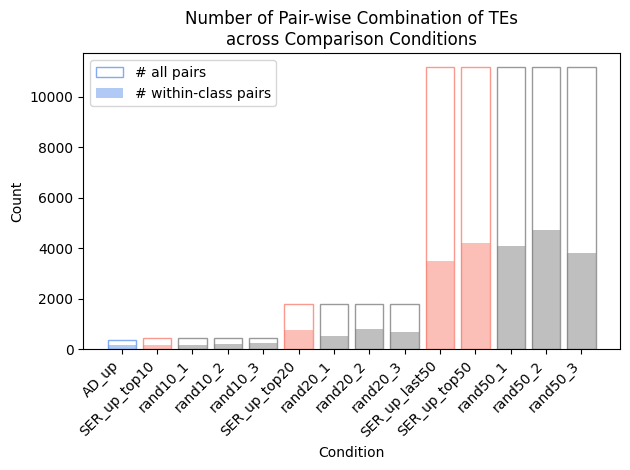

In [164]:
# Example data
summary_df = tcps_summ_df.copy()


x_pos = np.arange(summary_df.shape[0])
heights1 = summary_df['num_combination_all']  # dataset 1
heights2 = summary_df['num_combination_left' ]   # dataset 2

all_pair_colors = [condition_colors[cond] for cond in summary_df['condition'] ]


bar_width = 0.8 # need to adjust

# Plot side-by-side histograms
plt.bar(x_pos , heights1, width=bar_width, label='# all pairs', alpha=0.8, edgecolor=all_pair_colors, facecolor='none',)
plt.bar(x_pos , heights2, width=bar_width, label='# within-class pairs', alpha=0.5, color =all_pair_colors)

# Add labels and legend
plt.xticks(x_pos, summary_df.index, rotation = 45, ha = 'right')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Number of Pair-wise Combination of TEs\nacross Comparison Conditions')
plt.legend()
plt.tight_layout()
plt.show()


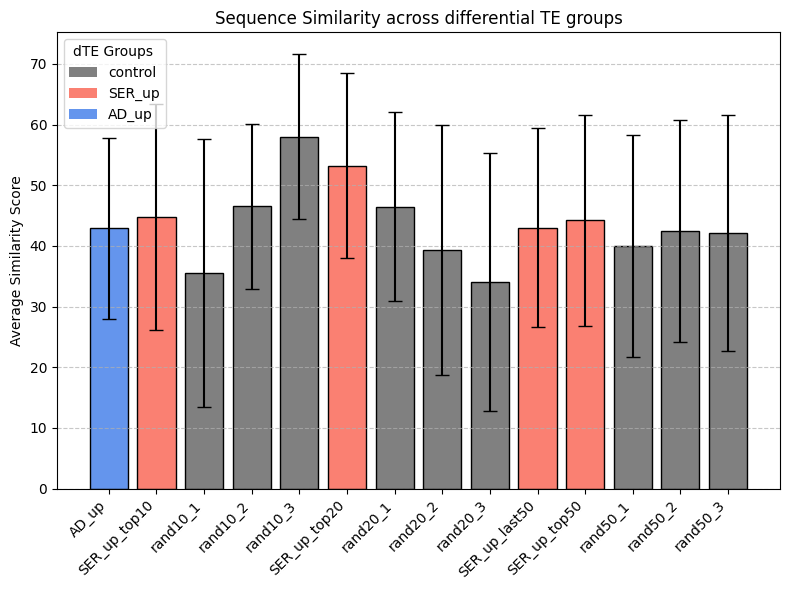

In [165]:
bar_colors = [condition_colors[cond] for cond in summary_df['condition'] ]

plt.figure(figsize=(8, 6))


plt.bar(summary_df.index, summary_df['avg_pctIdentity'] , yerr=summary_df['std_pctIdentity'], capsize=5, color=bar_colors, edgecolor='black')

plt.xticks(rotation=45, ha='right') 

legend_elements = [Patch(facecolor=color, label=cond) for cond, color in condition_colors.items()]
plt.legend(handles=legend_elements, title='dTE Groups ')


plt.ylabel('Average Similarity Score')
plt.title('Sequence Similarity across differential TE groups')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


In [166]:
summary_df.columns

Index(['avg_pctIdentity', 'std_pctIdentity', 'sum_pctIdentity',
       'num_element_sampled', 'num_combination_all', 'num_combination_left',
       'adjusted_avg_pctIdentity', 'adjusted_std_pctIdentity', 'condition'],
      dtype='object')

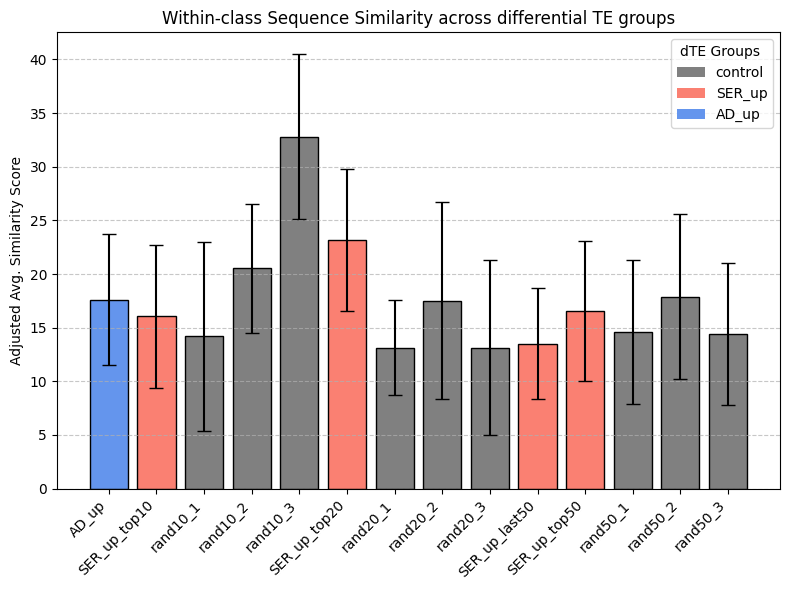

In [167]:
bar_colors = [condition_colors[cond] for cond in summary_df['condition'] ]

plt.figure(figsize=(8, 6))


plt.bar(summary_df.index, summary_df['adjusted_avg_pctIdentity'] , yerr=summary_df['adjusted_std_pctIdentity'], capsize=5, color=bar_colors, edgecolor='black')

plt.xticks(rotation=45, ha='right') 

legend_elements = [Patch(facecolor=color, label=cond) for cond, color in condition_colors.items()]
plt.legend(handles=legend_elements, title='dTE Groups ')

plt.ylabel('Adjusted Avg. Similarity Score')
plt.title('Within-class Sequence Similarity across differential TE groups')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


## save data

In [170]:
logi = pd.read_csv("./OUTPUT_EXPLAIN.csv", header = 0, index_col = 0)
logi.columns

Index(['count_table_indiv.csv', 'count_table_subF.csv', 'mm39_rmsk_full.tsv',
       'Deseq_indiv_locus_results.csv', 'genoLoc_Deseq_indiv_locus_result.csv',
       'compare_dTE_overlap/', 'genoLoc_TCPS_Deseq_indiv_locus_result.csv',
       'TCPS_all_Deseq_indiv_locus.csv', 'resampled_TCPS_all_TE_indi.csv',
       'TCPS_seq_similarity_summary_df.csv',
       'squire_tjp2_mut_seq_similarity_summary_df.csv',
       'squire_tjp2_wt_seq_similarity_summary_df.csv',
       'squire_tjp2_total_seq_similarity_summary_df.csv',
       'mouse_human_combined_similarity_suammry_df.csv',
       'squire_tjp2_total_seq_similarity_grouped_repClass_summary_df.csv',
       'TCPS_total_seq_similarity_grouped_repClass_summary_df.csv',
       'squire_all_Deseq_indiv_locus.csv', 'resampled_squire_all_TE_indi.csv'],
      dtype='object')

In [168]:
squire_sum_df.head()

,avg_pctIdentity,std_pctIdentity,sum_pctIdentity,num_element_sampled,num_combination_all,num_combination_left,adjusted_avg_pctIdentity,adjusted_std_pctIdentity,condition
rand10_1,56.103028,7.13755,9761.926831,30,435,174,22.441211,2.85502,control
rand10_2,43.767418,17.738312,6433.810505,30,435,147,14.790369,5.994326,control
rand10_3,35.661445,17.622744,10056.527417,30,435,282,23.118454,11.4244,control
mut_up_top10,33.622176,21.407951,11902.250373,30,435,354,27.361495,17.421643,mut_up
wt_up_top10,32.200916,21.543642,5892.767711,30,435,183,13.546592,9.063187,wt_up


In [179]:
squire_sum_df.to_csv("./squire_total_seq_similarity_repClassGrped_rvcmp_summary_df.csv", header = True, index = True )

In [175]:
logi['squire_total_seq_similarity_repClassGrped_rvcmp.csv'] = [ '9b' , 'NA', 'squire-quantified turner mouse organoid data. Seq-similarity summary df after controlling for same-repClass TE pairs as well as reverse and reverse-complement addition. But still kept the original fw-fw compare']

In [169]:
tcps_summ_df.head()

,avg_pctIdentity,std_pctIdentity,sum_pctIdentity,num_element_sampled,num_combination_all,num_combination_left,adjusted_avg_pctIdentity,adjusted_std_pctIdentity,condition
AD_up,42.878736,14.868415,6174.537923,27,351,144,17.591276,6.099862,AD_up
SER_up_top10,44.817826,18.61228,6991.580892,30,435,156,16.0726,6.674749,SER_up
rand10_1,35.549232,22.020211,6185.566331,30,435,174,14.219693,8.808084,control
rand10_2,46.51871,13.659351,8931.592354,30,435,192,20.532396,6.028955,control
rand10_3,58.022502,13.602979,14273.535438,30,435,246,32.812725,7.692719,control


In [181]:
tcps_summ_df.to_csv("./TCPS_total_seq_similarity_repClassGrped_rvcmp_summary_df.csv", header = True, index = True )

In [182]:
logi['TCPS_total_seq_similarity_repClassGrped_rvcmp.csv'] = [ '9b' , 'NA', 'TCPS data. Seq-similarity summary df after controlling for same-repClass TE pairs as well as reverse and reverse-complement addition. But still kept the original fw-fw compare']

In [187]:
# modify logi file names for the summary df
logi_columns_ls = list( logi.columns  )

In [189]:
logi_columns_ls[-2::] = ['squire_total_seq_similarity_repClassGrped_rvcmp_summary_df.csv',
 'TCPS_total_seq_similarity_repClassGrped_rvcmp_summary_df.csv']

In [190]:
logi_columns_ls

['count_table_indiv.csv',
 'count_table_subF.csv',
 'mm39_rmsk_full.tsv',
 'Deseq_indiv_locus_results.csv',
 'genoLoc_Deseq_indiv_locus_result.csv',
 'compare_dTE_overlap/',
 'genoLoc_TCPS_Deseq_indiv_locus_result.csv',
 'TCPS_all_Deseq_indiv_locus.csv',
 'resampled_TCPS_all_TE_indi.csv',
 'TCPS_seq_similarity_summary_df.csv',
 'squire_tjp2_mut_seq_similarity_summary_df.csv',
 'squire_tjp2_wt_seq_similarity_summary_df.csv',
 'squire_tjp2_total_seq_similarity_summary_df.csv',
 'mouse_human_combined_similarity_suammry_df.csv',
 'squire_tjp2_total_seq_similarity_grouped_repClass_summary_df.csv',
 'TCPS_total_seq_similarity_grouped_repClass_summary_df.csv',
 'squire_all_Deseq_indiv_locus.csv',
 'resampled_squire_all_TE_indi.csv',
 'squire_total_seq_similarity_repClassGrped_rvcmp_summary_df.csv',
 'TCPS_total_seq_similarity_repClassGrped_rvcmp_summary_df.csv']

In [191]:
logi.columns = logi_columns_ls

In [192]:
logi.to_csv("./OUTPUT_EXPLAIN.csv", header = True, index = True )